In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
from keras.datasets import fashion_mnist
from keras.utils import plot_model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

4422102/4422102 [==============================] - 0s 0us/step


<ipython-input-4-927c63daed7a>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i+1)


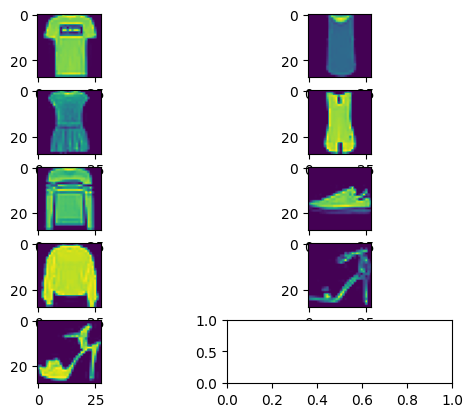

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5, 2, i+1)

In [8]:
x_train /= 255
x_test /= 255
epoch = 5
num = 10
batch_size = 64
model = None
def cnn_model(optimizer):
  model =Sequential()
  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = optimizer, metrics =['accuracy'])
  model.summary()
  return model

optimizer = ['rmsprop', 'SDG']
final_model = cnn_model('rmsprop')
plot_model(final_model, to_file = "mnist model"+".jpg", show_shapes = True)
hist=final_model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(x_test,y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 800)              

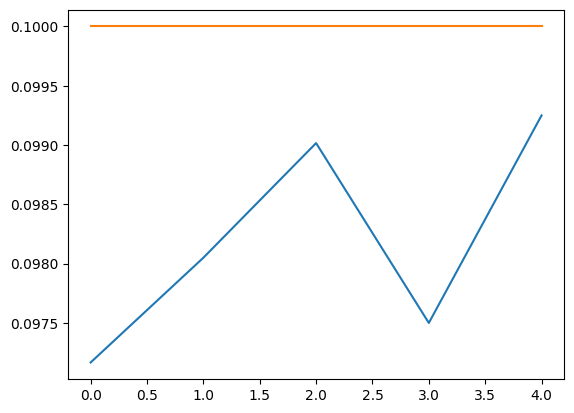

In [9]:
y1 = hist.history['accuracy']
y2 = hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

<ipython-input-12-ed52be13e8c8>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(final_model, "mnist.h5", save_format = "h5")


1/1 [==============================] - 0s 118ms/step
predicted label:  Bag


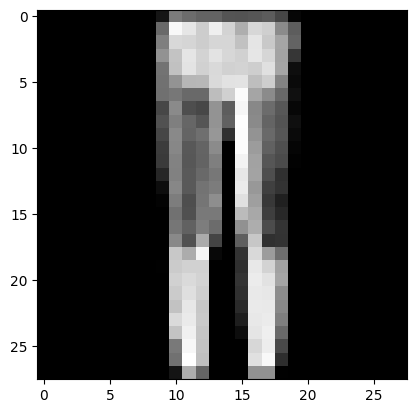

In [12]:
keras.models.save_model(final_model, "mnist.h5", save_format = "h5")
labels = {0:"Tee/Tep",
          1: "Trouser",
          2: "Pullover",
          3: "Dress",
          4: "Coat",
          5: "Sandal",
          6: "Shirt",
          7: "Sneaker",
          8: "Bag",
          9: "Ankle boot"}

def predict_image(model, img):
  img = np.reshape(img, (1, 28, 28))
  pred = model.predict(img)
  ans = np.argmax(pred)
  print("predicted label: ", labels[ans])

m = load_model('/content/mnist.h5')
predict_image(m, x_test[3])
plt.imshow(x_test[3], cmap = 'gray')